In [3]:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import pandas as pd

In [4]:
import os
print(os.getcwd())
os.chdir('C:/Users/Cheng/OneDrive/Documents/Proj/VarianceArithemtic/IPyNb')
print(os.getcwd())

C:\Users\Cheng
C:\Users\Cheng\OneDrive\Documents\Proj\VarianceArithemtic\IPyNb


In [5]:
N=128
sX = np.array([i/N* np.pi*2 for i in range(N+1)])

In [6]:
freq=7
ssSin = np.array([np.sin(sX * (freq + j/10)) for j in range(11)])
ssSin.shape

(11, 129)

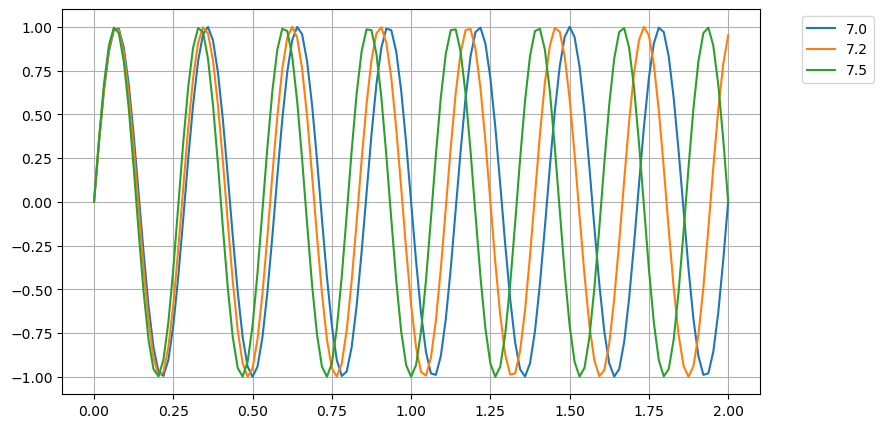

In [7]:
fig, ax = plt.subplots(figsize=(9,5))
for j in [0,2, 5]:
    plt.plot(sX/np.pi, ssSin[j], label=f'{freq + j/10}')
ax.legend()
ax.grid()
ax.legend(bbox_to_anchor=(1.05, 1.0))

In [8]:
ssSpec = sp.fft.fft(ssSin, n=N)
ssSpec.shape

(11, 128)

In [9]:
ssInt = np.abs(ssSpec)
ssInt.shape

(11, 128)

In [10]:
ssAngle = np.angle(ssSpec)
ssAngle.shape

(11, 128)

In [11]:
sFreq = np.array(range(N//2))
sFreq.shape

(64,)

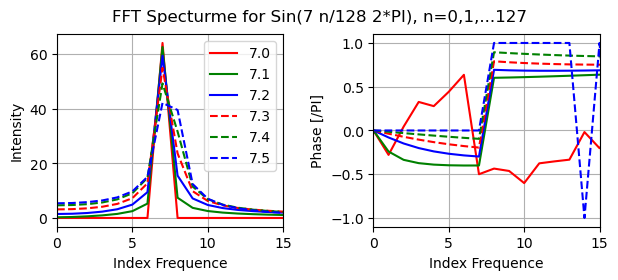

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(7,2.5))
plt.subplots_adjust(wspace=0.4)
fig.suptitle(f'FFT Specturme for Sin({freq} n/{N} 2*PI), n=0,1,...127')
sColor = ['r','g','b']*2
sLine = ['-']*3 + ['--']*3
sStyle = [sColor[j]+sLine[j] for j in range(6)]

ax1.set_xlabel('Index Frequence')
ax1.set_xlim([0, 15])
ax1.set_ylabel('Intensity')
ax1.grid()
for j in range(6):
    ax1.plot(sFreq, ssInt[j][:N//2], sStyle[j], label=f'{freq + j/10}')
ax1.legend()
    
ax2 = plt.subplot(1, 2, 2)
ax2.set_xlabel('Index Frequence')
ax2.set_ylabel('Phase [/PI]')
ax2.grid()
for j in range(6):
    ax2.plot(sFreq, ssAngle[j][:N//2]/np.pi, sStyle[j], label=f'{freq + j/10}')